In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
df = pd.DataFrame({
    'Feature1': np.random.randint(10, 100, 50),
    'Feature2': np.random.randint(200, 1000, 50),
    'Feature3': np.random.randint(1, 500, 50)
})

In [15]:
import pandas as pd
import numpy as np

# Sample DataFrame (Replace with actual data)
df = pd.DataFrame({
    'Feature1': np.random.randint(10, 100, 50),
    'Feature2': np.random.randint(200, 1000, 50),
    'Feature3': np.random.randint(1, 500, 50)
})

# Create an empty DataFrame to store all outliers
outliers_df = pd.DataFrame()

for col in df.columns:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get outliers for the current column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].copy()
    outliers["Outlier_Column"] = col  # Label the column where the outlier was found
    
    # Append to outliers_df
    outliers_df = pd.concat([outliers_df, outliers])

# Print all outliers in a structured format
print("Detected Outliers:\n", outliers_df)


Detected Outliers:
 Empty DataFrame
Columns: [Feature1, Feature2, Feature3, Outlier_Column]
Index: []


In [16]:
### 1. Handling Outliers with Quartiles & Tukey’s Method ###
# def detect_outliers_tukey(data, column):
for col in df.columns:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)])


Empty DataFrame
Columns: [Feature1, Feature2, Feature3]
Index: []
Empty DataFrame
Columns: [Feature1, Feature2, Feature3]
Index: []
Empty DataFrame
Columns: [Feature1, Feature2, Feature3]
Index: []


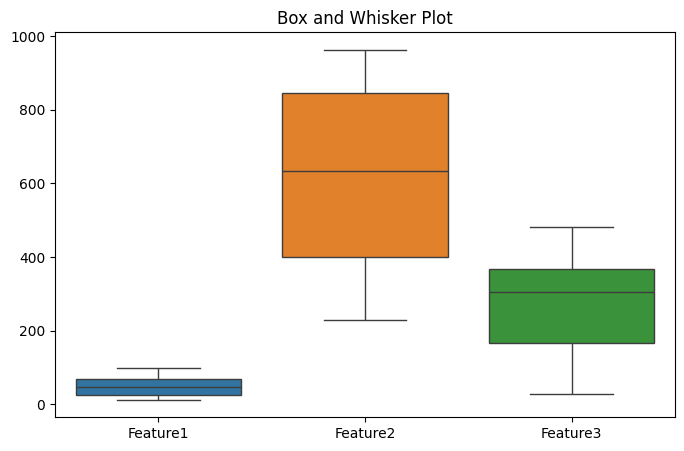

In [6]:
### 2. Box and Whisker Plot ###
plt.figure(figsize=(8, 5))
sns.boxplot(data=df)
plt.title("Box and Whisker Plot")
plt.show()


In [18]:
### 3. Z-Score for Outlier Detection ###
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return (z_scores > threshold)

outliers_z = detect_outliers_zscore(df)
print(outliers_z)

    Feature1  Feature2  Feature3
0      False     False     False
1      False     False     False
2      False     False     False
3      False     False     False
4      False     False     False
5      False     False     False
6      False     False     False
7      False     False     False
8      False     False     False
9      False     False     False
10     False     False     False
11     False     False     False
12     False     False     False
13     False     False     False
14     False     False     False
15     False     False     False
16     False     False     False
17     False     False     False
18     False     False     False
19     False     False     False
20     False     False     False
21     False     False     False
22     False     False     False
23     False     False     False
24     False     False     False
25     False     False     False
26     False     False     False
27     False     False     False
28     False     False     False
29     Fal

In [20]:
### 4. Standardization (Z-score Normalization) ###
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)
print(df_standardized)

    Feature1  Feature2  Feature3
0  -1.546346 -0.298527  0.437226
1  -0.658569  1.447907  1.653372
2   1.318753  1.569361 -1.709344
3   0.148501  1.050038 -0.354001
4  -0.295388  1.393462  1.492196
5   1.439813  0.279429  1.015994
6   0.673097  1.100295 -0.581113
7  -0.255034  0.044896 -0.507851
8  -0.779630  1.460471 -0.412610
9  -0.456802 -1.626152  0.305355
10  1.116985  0.178915  0.957385
11 -0.376095  0.522339  0.935407
12  0.753804  0.936960  0.385943
13  0.108147 -0.796910 -0.273413
14  0.955571 -0.595882 -1.745975
15 -1.465639  1.188245  0.224767
16 -1.748114  0.807129  0.188136
17  0.471329 -1.383243 -1.518863
18 -0.658569  1.225938 -0.727636
19  1.641581  0.869950 -1.013357
20 -0.698923 -0.792722  1.829200
21  0.229208  1.129612  0.070917
22  1.318753 -1.358114  0.605728
23  0.471329 -0.030489  1.382303
24  0.350268 -1.215719  1.081930
25 -1.465639 -1.014691 -1.533516
26 -1.788467 -1.647092 -0.683679
27 -0.295388  0.371567 -0.786246
28  0.229208  0.706615  1.411608
29 -0.8603

In [21]:
### 5. MinMax Scaling ###
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)
print(df_minmax)

    Feature1  Feature2  Feature3
0   0.070588  0.419271  0.610656
1   0.329412  0.962240  0.950820
2   0.905882  1.000000  0.010246
3   0.564706  0.838542  0.389344
4   0.435294  0.945312  0.905738
5   0.941176  0.598958  0.772541
6   0.717647  0.854167  0.325820
7   0.447059  0.526042  0.346311
8   0.294118  0.966146  0.372951
9   0.388235  0.006510  0.573770
10  0.847059  0.567708  0.756148
11  0.411765  0.674479  0.750000
12  0.741176  0.803385  0.596311
13  0.552941  0.264323  0.411885
14  0.800000  0.326823  0.000000
15  0.094118  0.881510  0.551230
16  0.011765  0.763021  0.540984
17  0.658824  0.082031  0.063525
18  0.329412  0.893229  0.284836
19  1.000000  0.782552  0.204918
20  0.317647  0.265625  1.000000
21  0.588235  0.863281  0.508197
22  0.905882  0.089844  0.657787
23  0.658824  0.502604  0.875000
24  0.623529  0.134115  0.790984
25  0.094118  0.196615  0.059426
26  0.000000  0.000000  0.297131
27  0.435294  0.627604  0.268443
28  0.588235  0.731771  0.883197
29  0.2705

In [22]:
### 6. Principal Component Analysis (PCA) ###
pca = PCA(n_components=2)  # Reduce to 2 principal components
df_pca = pca.fit_transform(df_standardized)
print(df_pca)

[[ 0.20350173  1.5855902 ]
 [-2.02586873  1.07592632]
 [-0.17830917 -1.56770828]
 [-0.52190702 -0.16374064]
 [-1.94611005  0.68419857]
 [-1.16770907 -1.1707124 ]
 [-0.50105167 -0.72133897]
 [ 0.36575925  0.14209711]
 [-0.59300109  0.75106504]
 [ 1.01819487  0.42262084]
 [-0.99550505 -0.87395093]
 [-0.93722416  0.59599453]
 [-1.06585756 -0.60127894]
 [ 0.72629081 -0.20748823]
 [ 1.4351372  -1.33911756]
 [-0.70911731  1.5420922 ]
 [-0.36280875  1.7889677 ]
 [ 1.92376918 -0.86094031]
 [-0.23516839  0.55262101]
 [-0.22693655 -1.77109994]
 [-0.5668553   1.03122734]
 [-0.88487448 -0.14688092]
 [ 0.2859792  -1.22976789]
 [-1.01748853 -0.16447819]
 [ 0.04338755 -0.17534972]
 [ 2.04386328  1.04480779]
 [ 1.96544906  1.50771249]
 [ 0.33540468  0.13943096]
 [-1.50870095  0.11799124]
 [ 1.45386276  0.55877355]
 [-1.57963189 -1.16009566]
 [ 1.80183185  0.56319148]
 [ 0.31504716 -1.78616232]
 [-1.56131171 -0.49099686]
 [ 0.68320826 -0.78147507]
 [ 0.80324855  1.05658942]
 [-0.24059877  0.55777483]
 

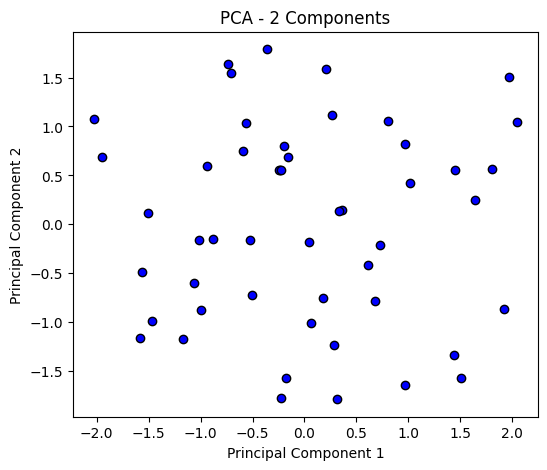

In [23]:
# Plot PCA
plt.figure(figsize=(6, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='blue', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Components')
plt.show()
